# Exploratory Data Analysis for the Groundtruth data

Import libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Some Matplotlib configuration:

In [2]:
font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 22 }
plt.rc('font', **font)

Import the config file which contains all the paths:

In [3]:
import sys

In [4]:
sys.path.append('..')

In [5]:
import config

**Groundtruth**

In [6]:
config.DEV_GROUNDTRUTH

'/datasets/dev-set/ground-truth/ground-truth_dev-set.csv'

In [7]:
dev_ground_truth = pd.read_csv(config.DEV_GROUNDTRUTH) 

In [8]:
dev_ground_truth.shape

(8000, 5)

In [9]:
dev_ground_truth.head(2)

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video10.webm,0.950,34,0.900,10
1,video100.webm,0.951,33,0.889,9


In [10]:
dev_ground_truth.set_index('video', inplace=True)

In [11]:
dev_ground_truth.head()

,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
video,,,,
video10.webm,0.950,34,0.900,10
video100.webm,0.951,33,0.889,9
video10000.webm,0.832,33,1.000,13
video10001.webm,0.865,33,0.727,11
video10002.webm,0.899,59,0.792,24


In [12]:
dev_ground_truth.iloc[0, :]

short-term_memorability       0.95
nb_short-term_annotations    34.00
long-term_memorability        0.90
nb_long-term_annotations     10.00
Name: video10.webm, dtype: float64

In [13]:
dev_ground_truth.loc['video10.webm', :]

short-term_memorability       0.95
nb_short-term_annotations    34.00
long-term_memorability        0.90
nb_long-term_annotations     10.00
Name: video10.webm, dtype: float64

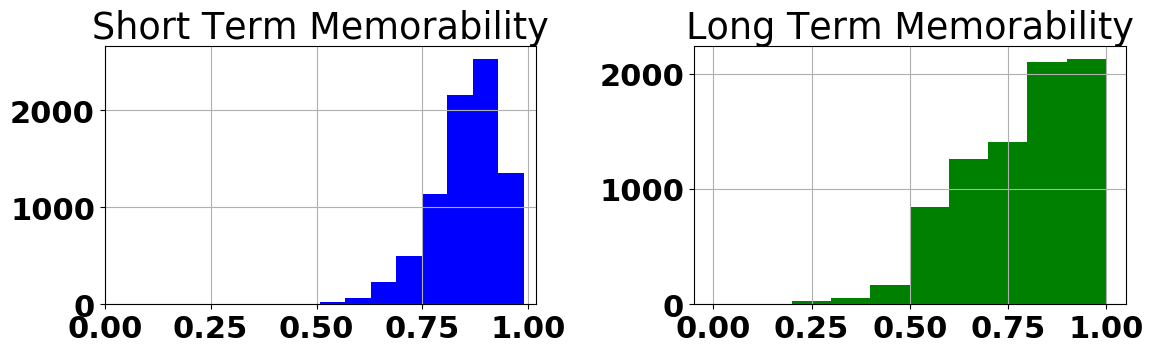

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), dpi=100)
ax0, ax1 = axes.flatten()

dev_ground_truth['short-term_memorability'].hist(ax=ax0, color='b')
ax0.set_title('Short Term Memorability')
ax0.set_xticks(np.arange(0, 1.25, 0.25))

dev_ground_truth['long-term_memorability'].hist(ax=ax1, color='g')
ax1.set_title('Long Term Memorability')
ax1.set_xticks(np.arange(0, 1.25, 0.25))

fig.tight_layout()
plt.savefig('../../figures/Exploring_Short_and_Long_Memorability_histograms.png', bbox_inches='tight')
plt.show()

In [15]:
dev_ground_truth.describe()

,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
count,8000.000000,8000.00000,8000.000000,8000.00000
mean,0.859000,36.27575,0.778924,12.77050
std,0.081679,8.36857,0.145165,3.57707
min,0.388000,30.00000,0.000000,9.00000
25%,0.809000,33.00000,0.695000,10.00000
50%,0.867000,33.00000,0.800000,12.00000
75%,0.922000,34.00000,0.900000,14.00000
max,0.989000,100.00000,1.000000,40.00000


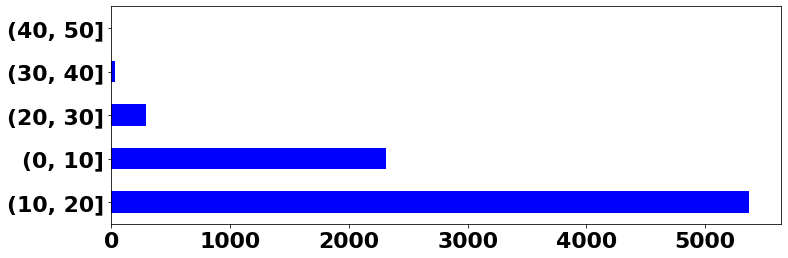

In [16]:
img = pd.cut(dev_ground_truth['nb_long-term_annotations'], bins=range(0, 60, 10)).value_counts().plot.barh(
    figsize=(12, 4), color='b')

In [17]:
img.get_figure().savefig('../../figures/Exploring_nb_long-term_annotations.png', bbox_inches='tight')

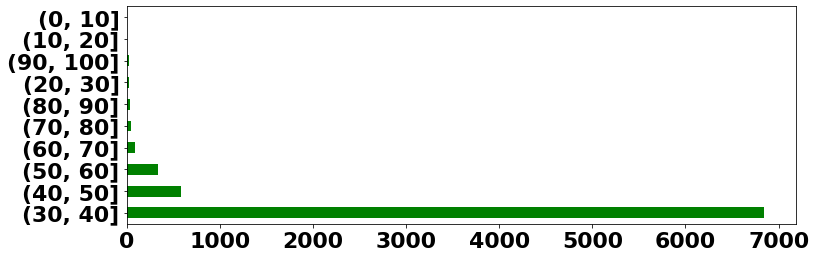

In [18]:
img = pd.cut(dev_ground_truth['nb_short-term_annotations'], bins=range(0, 110, 10)).value_counts().plot.barh(
    figsize=(12, 4), color='g')

In [19]:
img.get_figure().savefig('../../figures/Exploring_nb_short-term_annotations.png', bbox_inches='tight')

In [20]:
# show videos of high vs low memorabilty using their frames... extract frames and show that

In [26]:
N = 5
print('** Top-{} Ranking **'.format(N))
for i, row in enumerate(dev_ground_truth.sort_values('short-term_memorability', ascending=False).iloc[0:N, :].index):
    print('{}. {}'.format(i + 1, row))

** Top-5 Ranking **
1. video798.webm
2. video1981.webm
3. video4903.webm
4. video9496.webm
5. video6103.webm


In [27]:
N = 5
print('** Top-{} Ranking **'.format(N))
for i, row in enumerate(dev_ground_truth.sort_values('long-term_memorability', ascending=False).iloc[0:N, :].index):
    print('{}. {}'.format(i + 1, row))

** Top-5 Ranking **
1. video5186.webm
2. video4798.webm
3. video480.webm
4. video7606.webm
5. video4809.webm


In [ ]:
# extract frames and show that